In [ ]:
#Install non-standard packages (assuming jupyter notebook)
!pip install shap
!pip install lime
!pip install eli5

In [ ]:
# load the dataset 
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

data = pd.read_excel('/content/drive/MyDrive/Pump Predictive Maintenance/Condition Hydraulic Pump/condition Hydraulic.xlsx')
data.head()

,Unnamed: 0,cycle_id,date,PS1,PS2,PS3,PS4,PS5,PS6,FS1,FS2,TS1,TS2,TS3,TS4,P1,VS1,CE1,CP1,SE1,cooler,valve,leakage,accumulator,stable,rul,label1
0,0,1,2019-01-01 00:00:00,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,2538.929167,0.576950,39.601350,1.862750,59.157183,3,100,0,130,1,35.166667,0
1,1,2,2019-01-01 00:10:00,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,2531.498900,0.565850,25.786433,1.255550,59.335617,3,100,0,130,1,35.000000,0
2,2,3,2019-01-01 00:20:00,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,2519.928000,0.576533,NaN,1.113217,59.543150,3,100,0,130,1,34.833333,0
3,3,4,2019-01-01 00:30:00,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,2511.541633,0.569267,20.459817,1.062150,59.794900,3,100,0,130,1,34.666667,0
4,4,5,2019-01-01 00:40:00,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,2503.449500,0.577367,19.787017,1.070467,59.455267,3,100,0,130,1,34.500000,0


In [ ]:
df = pd.DataFrame(data, columns=['PS1','PS3', 'PS4', 'PS5', 'FS1', 'FS2', 'TS1', 'P1', 'VS1', 'CE1', 'CP1', 'SE1', 'leakage'])

In [ ]:
df = df.fillna(method='ffill')
df.head()

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1,leakage
0,160.673492,1.991475,0.0,9.842170,6.709815,10.304592,35.621983,2538.929167,0.576950,39.601350,1.862750,59.157183,0
1,160.603320,1.976234,0.0,9.635142,6.715315,10.403098,36.676967,2531.498900,0.565850,25.786433,1.255550,59.335617,0
2,160.347720,1.972224,0.0,9.530548,6.718522,10.366250,37.880800,2519.928000,0.576533,25.786433,1.113217,59.543150,0
3,160.188088,1.946575,0.0,9.438827,6.720565,10.302678,38.879050,2511.541633,0.569267,20.459817,1.062150,59.794900,0
4,160.000472,1.922707,0.0,9.358762,6.690308,10.237750,39.803917,2503.449500,0.577367,19.787017,1.070467,59.455267,0


In [ ]:
df['leakage'].unique()

array([0, 2, 1])

In [ ]:
X = df.iloc[:, :12]
y = df.iloc[:, 12]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
#test_y = le.fit_transform(test_y)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
import keras
y_train = keras.utils.to_categorical(y_train, num_classes = 3)
y_test = keras.utils.to_categorical(y_test, num_classes = 3)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Part 2 - Now let's make the ANN!
# import necessary modules  
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from sklearn.metrics import classification_report, confusion_matrix
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=12))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 300, batch_size = 32)

Epoch 1/300
56/56 [==============================] - 1s 1ms/step - loss: 1.3375 - accuracy: 0.2322
Epoch 2/300
56/56 [==============================] - 0s 2ms/step - loss: 1.0360 - accuracy: 0.5642
Epoch 3/300
56/56 [==============================] - 0s 1ms/step - loss: 0.9923 - accuracy: 0.6221
Epoch 4/300
56/56 [==============================] - 0s 1ms/step - loss: 0.9580 - accuracy: 0.6227
Epoch 5/300
56/56 [==============================] - 0s 1ms/step - loss: 0.9465 - accuracy: 0.6043
Epoch 6/300
56/56 [==============================] - 0s 1ms/step - loss: 0.9133 - accuracy: 0.6275
Epoch 7/300
56/56 [==============================] - 0s 1ms/step - loss: 0.9058 - accuracy: 0.6204
Epoch 8/300
56/56 [==============================] - 0s 1ms/step - loss: 0.8897 - accuracy: 0.6326
Epoch 9/300
56/56 [==============================] - 0s 2ms/step - loss: 0.8810 - accuracy: 0.6204
Epoch 10/300
56/56 [==============================] - 0s 1ms/step - loss: 0.8671 - accuracy: 0.6233
Epoch 11/

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
y_pred = model.predict(X_test)

Test score: 0.023345986381173134
Test accuracy: 0.9909297227859497


In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       0.99      0.97      0.98       101
           2       0.97      0.99      0.98       112

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441

[[228   0   0]
 [  0  98   3]
 [  0   1 111]]


In [ ]:
model.save('leakage.h5')

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from sklearn.metrics import f1_score
# perform permutation importance
results = permutation_importance(model, X_train, y_train, scoring='f1')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

ValueError: ignored

In [ ]:
df.sample(10)

,PS1,PS3,PS4,PS5,FS1,FS2,TS1,P1,VS1,CE1,CP1,SE1,leakage
1743,160.682812,1.966124,10.111747,9.878805,6.523390,10.175785,35.972317,2550.211033,0.544350,47.611933,2.168950,57.215783,1
1948,160.492123,1.910307,10.085908,9.855468,6.372402,10.156538,36.199967,2565.915267,0.539217,46.897250,2.128733,54.709350,2
1149,158.464413,1.762262,0.000000,9.146661,6.470398,9.697162,44.578933,2471.423300,0.610183,27.758567,1.757550,57.702650,1
918,158.352453,1.782746,0.000000,8.998992,6.637715,9.615803,46.438917,2442.769367,0.625183,26.461633,1.721600,59.820967,0
1906,161.117303,1.993822,0.188128,9.846316,6.694112,10.168597,36.237150,2541.379400,0.534950,47.453417,2.173750,58.804550,0
1179,158.938173,1.799205,0.000023,9.146790,6.686517,9.705005,44.610567,2465.650067,0.603783,27.686700,1.781083,59.909350,0
982,157.886552,1.727004,0.000000,9.030977,6.372348,9.629887,45.961133,2471.505767,0.624350,27.078950,1.712250,56.917817,2
638,172.801707,1.104562,0.000000,8.408293,3.266573,8.911047,57.118100,2621.011100,0.732583,18.647217,1.468933,30.315450,2
236,156.147247,1.641392,0.000000,8.532672,6.276127,9.203810,54.197267,2415.724067,0.652667,20.244567,1.552733,56.681733,2
1943,160.472172,1.912446,10.085205,9.854015,6.378222,10.154337,36.219100,2565.180633,0.538833,47.011700,2.135583,54.882750,2


In [ ]:
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier    
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion = "entropy", max_depth=3)

clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)  

print ("Accuracy : ", accuracy_score(y_test,y_pred_gini)*100)         # Evaulating predictions with test labels
print ("Report : ",  classification_report(y_test, y_pred_gini))
text_representation = tree.export_text(clf_gini, feature_names=X.columns.tolist())
print(text_representation)

Accuracy :  91.60997732426304
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       0.76      0.93      0.84       101
           2       0.92      0.74      0.82       112

    accuracy                           0.92       441
   macro avg       0.89      0.89      0.89       441
weighted avg       0.92      0.92      0.92       441

|--- SE1 <= 57.99
|   |--- FS1 <= 6.44
|   |   |--- TS1 <= 54.35
|   |   |   |--- class: 2
|   |   |--- TS1 >  54.35
|   |   |   |--- class: 1
|   |--- FS1 >  6.44
|   |   |--- FS1 <= 6.60
|   |   |   |--- class: 1
|   |   |--- FS1 >  6.60
|   |   |   |--- class: 0
|--- SE1 >  57.99
|   |--- FS1 <= 6.50
|   |   |--- class: 1
|   |--- FS1 >  6.50
|   |   |--- class: 0



Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.16365
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.06096
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.77539


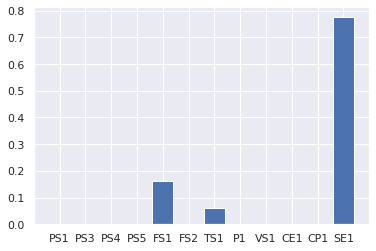

In [ ]:
from matplotlib import pyplot
# get importance
importance = clf_gini.feature_importances_
# summarize feature importance
for feature_names,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (feature_names,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, tick_label= X.columns)
pyplot.show()